In [2]:
import numpy as np
np.int = np.int_
np.float = np.float_
import copy as cp
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import pyemma.plots as mplt
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma
import msmbuilder as mb
from msmbuilder.msm import MarkovStateModel 

## example

In [4]:
dtrj = np.load('../dtrajs_clus300.npy', allow_pickle=True)

In [7]:
model1 = MarkovStateModel(lag_time=20)

In [14]:
model1.fit(dtrj)

MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%


MarkovStateModel(lag_time=20)

In [19]:
model1.score(dtrj)

MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%


34.46054890321024

In [6]:
msm_lags = [10,20,30,40,50,60]
n_pcca = [2,3,4,5]

In [19]:
dtrj = [
    [
        np.load(f'saved_mdtrj/mdtrj_300_lag{l}_pcca{p}.npy', allow_pickle=True)
    for p in n_pcca]
for l in msm_lags]

In [22]:
gmrq_full = np.zeros(( len(msm_lags), len(n_pcca) ))
for l in range(len(msm_lags)):
    for p in range(len(n_pcca)):
        
        model = MarkovStateModel(lag_time=msm_lags[l])
        model.fit( dtrj[l][p] )
        gmrq_full[l,p] = model.score(dtrj[l][p])

MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with popula

In [23]:
gmrq_full

array([[1.99967564, 2.97575925, 3.90377782, 4.77007529],
       [1.99956496, 2.97357798, 3.88580651, 3.87394346],
       [1.99950308, 2.97195525, 3.86223117, 3.85803774],
       [1.99944229, 2.97082836, 3.8605427 , 3.75259249],
       [1.99935869, 2.96950692, 3.82747579, 3.81751726],
       [1.9993033 , 2.96877836, 3.81441531, 3.79811232]])

# msm lag = 20

In [53]:
dtrj = [
        np.load(f'saved_mdtrj/mdtrj_300_lag20_pcca{p}.npy', allow_pickle=True)
    for p in n_pcca]

In [54]:
cv=10
total, fit = 31, 25

gmrq_train = np.zeros(( len(n_pcca), cv ))
gmrq_test = np.zeros(( len(n_pcca), cv ))

for p in range(len(n_pcca)):

    np.random.seed(42)
    for n in range(cv):

        perm = np.random.permutation(total)
        train = [dtrj[p][i] for i in perm[:fit]]
        test = [dtrj[p][i] for i in perm[fit:]]

        model = MarkovStateModel(lag_time=20)
        model.fit(train)
        gmrq_train[p,n] = model.score(train)
        gmrq_test[p,n] = model.score(test)

MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.05. Component 0 selected, with population 80.028893%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.05. Component 0 selected, with population 90.926219%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.05. Component 0 selected, with population 90.926219%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with popula

In [58]:
np.nanmean(gmrq_train, axis=1)

array([1.99951336, 2.97310176, 3.8807924 , 3.87022948])

In [59]:
np.nanmean(gmrq_test, axis=1)

array([1.70787927, 2.58173718, 2.80473706, 2.16904495])

In [65]:
np.nanstd(gmrq_test, axis=1)

array([0.59377348, 1.05136442, 1.7379998 , 2.35497271])

In [69]:
gmrq_test[3]

array([ 3.79950407,  0.61596914,  3.82946382,         nan,  3.85985193,
       -1.94292631, -1.7223309 ,  3.32957679,  3.86101113,  3.89128488])

In [70]:
np.save('gmrq.txt', gmrq_test)

In [3]:
gmrq_test = np.load('gmrq.txt.npy')

In [4]:
gmrq_test.shape

(4, 10)

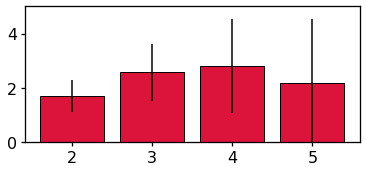

In [9]:
fig,ax=plt.subplots(1, figsize=(6,2.5))
ax.bar(n_pcca, np.nanmean(gmrq_test, axis=1), yerr=np.nanstd(gmrq_test, axis=1),
       color='crimson', edgecolor='black')
ax.set_xticks([2,3,4,5])
ax.set_ylim(0,5)
ax.tick_params(labelsize=16, length=4, width=1.3)
ax.spines[:].set_linewidth(1.3)
plt.savefig('gmrq.pdf')
plt.show()

In [24]:
cv=10
total, fit = 31, 25
gmrq_train = np.zeros(( len(msm_lags), len(n_pcca), cv ))
gmrq_test = np.zeros(( len(msm_lags), len(n_pcca), cv ))

for l in range(len(msm_lags)):
    for p in range(len(n_pcca)):
        
        np.random.seed(42)
        for n in range(cv):
            
            perm = np.random.permutation(total)
            train = [dtrj[l][p][i] for i in perm[:fit]]
            test = [dtrj[l][p][i] for i in perm[fit:]]
            
            model = MarkovStateModel(lag_time=msm_lags[l])
            model.fit(train)
            gmrq_train[l,p,n] = model.score(train)
            gmrq_test[l,p,n] = model.score(test)

MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.10. Component 0 selected, with population 80.013683%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.10. Component 0 selected, with population 90.918367%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.10. Component 0 selected, with population 90.918367%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.05. Component 1 selected, with popul

MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.05. Component 0 selected, with population 90.926219%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.03. Component 0 selected, with popul

MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.02. Component 1 selected, with popul

MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.02. Component 1 selected, with population 68.731801%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with popula

In [30]:
np.nanmean(gmrq_train,axis=2)

array([[1.99963785, 2.97527866, 3.90561685, 4.74840086],
       [1.99951336, 2.97310176, 3.8807924 , 3.87022948],
       [1.99944353, 2.97142365, 3.85516582, 3.85407217],
       [1.99937492, 2.97027901, 3.85805103, 3.74309279],
       [1.99928057, 2.96892977, 3.8207681 , 3.81635901],
       [1.99921807, 2.96822356, 3.81005968, 3.7967457 ]])

In [31]:
np.nanmean(gmrq_test,axis=2)

array([[ 1.87194963,  2.20595642,  2.5942959 ,  2.65143343],
       [ 1.70787927,  2.58173718,  2.80473706,  2.16904495],
       [ 1.98526386,  2.77649045,  4.79621388,  3.74426751],
       [ 1.94550902,  3.1687898 ,  3.37975674,  2.51974434],
       [ 2.00992178,  2.62358335, -1.77576741,  2.81711959],
       [ 1.8797967 ,  2.94589208,  3.82642821,  3.50572692]])

In [52]:
np.nanstd(gmrq_test,axis=2)

array([[ 0.31274945,  1.25698767,  1.79398966,  4.20284527],
       [ 0.59377348,  1.05136442,  1.7379998 ,  2.35497271],
       [ 0.10716495,  0.6967329 ,  5.10639673,  5.02848544],
       [ 0.15088516,  0.71912835,  1.04269317,  1.49022904],
       [ 0.1039142 ,  0.49353908, 15.15797088,  3.15925033],
       [ 0.20038903,  0.83774912,  6.02042713,  1.445569  ]])

In [50]:
dd=cp.deepcopy(gmrq_test)
dd[np.isnan(dd)]=0
np.mean(dd, axis=2)

array([[ 1.68475467,  1.54416949,  2.33486631,  2.65143343],
       [ 1.53709134,  2.06538974,  2.80473706,  1.95214045],
       [ 1.3896847 ,  2.4988414 ,  4.79621388,  3.74426751],
       [ 1.75095812,  2.21815286,  3.37975674,  2.51974434],
       [ 1.60793742,  1.83650835, -1.77576741,  2.53540763],
       [ 1.69181703,  2.35671366,  3.44378539,  3.50572692]])

In [51]:
np.std(dd, axis=2)

array([[ 0.63514454,  1.45874048,  1.87144127,  4.20284527],
       [ 0.76146365,  1.39669339,  1.7379998 ,  2.32695829],
       [ 0.91416972,  1.06334096,  5.10639673,  5.02848544],
       [ 0.6009494 ,  1.57183331,  1.04269317,  1.49022904],
       [ 0.80932331,  1.2712106 , 15.15797088,  3.11400563],
       [ 0.59511965,  1.39641817,  5.82569552,  1.445569  ]])

In [35]:
cv=10
total, fit = 31, 20
gmrq_train3 = np.zeros(( len(msm_lags), len(n_pcca), cv ))
gmrq_test3 = np.zeros(( len(msm_lags), len(n_pcca), cv ))

for l in range(len(msm_lags)):
    print(msm_lags[l])
    for p in range(len(n_pcca)):
        
        np.random.seed(42)
        for n in range(cv):
            
            perm = np.random.permutation(total)
            train = [dtrj[l][p][i] for i in perm[:fit]]
            test = [dtrj[l][p][i] for i in perm[fit:]]
            
            model = MarkovStateModel(lag_time=msm_lags[l])
            model.fit(train)
            gmrq_train3[l,p,n] = model.score(train)
            gmrq_test3[l,p,n] = model.score(test)

10
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.10. Component 1 selected, with population 71.011638%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with pop

MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.05. Component 0 selected, with population 71.008465%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.05. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.03. Component 1 selected, with population 71.005291%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.03. Component 1 selected, with population 71.002116%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.03. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with popula

MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
60
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 2 strongly connected components above weight=0.02. Component 1 selected, with population 70.995763%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with pop

MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.02. Component 0 selected, with popula

In [36]:
np.nanmean(gmrq_train3, axis=2)

array([[1.99964126, 2.98051569, 3.91304904, 4.76063904],
       [1.99951668, 2.97875805, 3.88820805, 3.87755794],
       [1.99944194, 2.97738138, 3.8540551 , 3.86275006],
       [1.99937151, 2.97648344, 3.86829106, 3.75110503],
       [1.9992749 , 2.97538959, 3.82960097, 3.82540739],
       [1.99921192, 2.97487456, 3.8189712 , 3.80532578]])

In [37]:
np.nanmean(gmrq_test3, axis=2)

array([[1.99961106, 2.74711848, 3.43554494, 4.51129131],
       [1.99944526, 2.43319694, 3.54026275, 3.82218334],
       [1.99937219, 2.64294583, 3.78262689, 3.80241752],
       [1.99929619, 2.60661352, 3.78827732, 1.29512088],
       [1.99919121, 2.46512123, 3.76129107, 3.36494654],
       [1.99912356, 3.16880708, 3.73437682, 3.57186986]])

In [44]:
np.mean(gmrq_test3, axis=2)

array([[       nan, 2.74711848, 3.43554494, 4.51129131],
       [       nan, 2.43319694, 3.54026275,        nan],
       [       nan, 2.64294583, 3.78262689,        nan],
       [       nan, 2.60661352,        nan, 1.29512088],
       [       nan, 2.46512123,        nan, 3.36494654],
       [       nan, 3.16880708,        nan, 3.57186986]])